## 3 

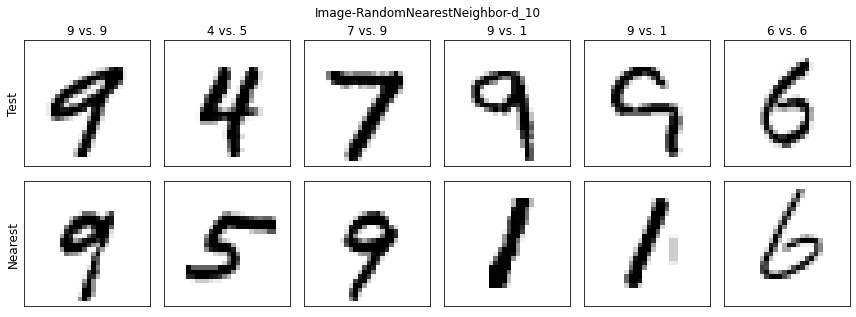

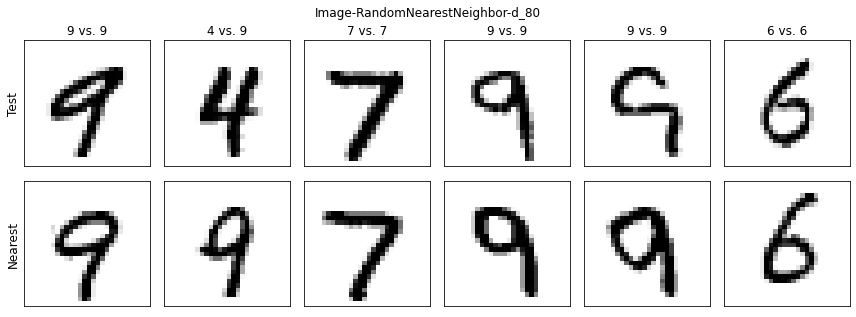

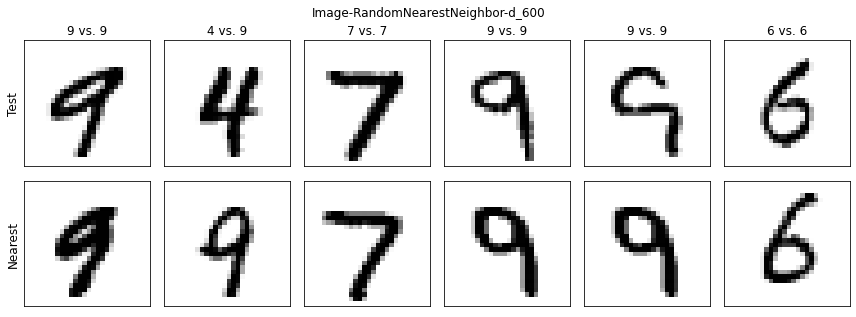

In [1]:
from __future__ import division
"""
Randomized Nearest Neighbors

@author: Brett
"""

import numpy as np
from mnist_tools import *
from plot_tools import *

"""
Arguments: 
- a 2d numpy array train with shape (r,c) of training images (one image per row)
- a 2d numpy array test with shape (t,c) of test images (one image per row)
- an integer d, the length of the vectors after projecting

Perform nearest neighbors after randomly projecting the data.  More precisely, 
randomly project the data to turn each image (in train and test)
into a new vector with d values, and then perform nearest neighbor on each test image
using this "compressed" data.

Returns:
A list with t elements containing the closest training image to 
each test image.  The distances are computed in l2 (Euclidean) between
the randomly projected images.
"""
def random_nearest_neighbors(train, test, d): 
    use = (train.shape[1], d) 
    compute = np.random.normal(0, 1, size = use) 
    trained_p = train @ compute 
    test_p = test @ compute 
    ans = [] 
    for i in range(len(test_p)): 
        dist = np.inf 
        index = 0 
        for j in range(len(trained_p)): 
            error = test_p[i] - trained_p[j] 
            if dist > np.linalg.norm(error): 
                index = j 
                dist = np.linalg.norm(error) 
        ans.append(index) 
    return ans 

"""
Handles the nearest neighbor output for dimension d
"""
def process_dim(all_train, test, testLabels, d) :
    idxs = random_nearest_neighbors(all_train,test,d)
    imgs = []
    estLabels = []
    for i in range(len(testLabels)) :
        trueDigit = testLabels[i]
        testImage = test[i,:]
        trainImage = all_train[idxs[i],:]
        imgs.extend( [testImage,trainImage] )
        estLabels.append(idxs[i]//100)

    row_titles = ['Test','Nearest']
    col_titles = ['%d vs. %d'%(i,j) for i,j in zip(testLabels,estLabels)]
    plot_image_grid(imgs,
                    "Image-RandomNearestNeighbor-d_%d"%d,
                    (28,28),len(testLabels),2,True,
                    row_titles=row_titles,
                    col_titles=col_titles)

"""
Assumes the data file is in 'mnist_all.mat'.
"""
def main() :
    datafile = "mnist_all.mat" #Change if you put the file in a different path
    train = load_train_data(datafile)
    test,test_labels = load_test_data(datafile)
    all_train = np.concatenate(train)
    process_dim(all_train,test,test_labels, 10)
    process_dim(all_train,test,test_labels, 80)
    process_dim(all_train,test,test_labels, 600)

if __name__ == "__main__" :
    main()
